In [40]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression:
    def __init__(self, degree, num_samples = 100, sine_scale = 1):
        self.degree = degree
        self.num_samples = num_samples
        self.sine_scale = sine_scale
        
        self.x = np.linspace(-1, 1, num_samples)
        self.y = np.sin(self.x * self.sine_scale * np.pi)
        self.X = np.vstack([self.x**i for i in range(degree + 1)]).T
        
    def check_coefficients(self, coefficients):
        assert len(coefficients) == self.degree + 1
        
    def plot_graph(self, coefficients, show_scatter=False):
        self.check_coefficients(coefficients)
        x_smooth = np.linspace(-1, 1, 1000)        
        y_smooth = np.sin(x_smooth * self.sine_scale * np.pi)
        p = np.poly1d(coefficients[::-1])

        plt.plot(x_smooth, y_smooth)
        if show_scatter:
            plt.scatter(self.x, self.y)
        plt.plot(x_smooth, p(x_smooth), color='red')
        plt.show()
        
    def mse(self, coefficients):
        self.check_coefficients(coefficients)
        y_pred = self.X @ coefficients
        return 1/(2*self.num_samples) * np.sum((y_pred - self.y) ** 2)
        
    def gradient(self, coefficients):
        self.check_coefficients(coefficients)
        y_pred = self.X @ coefficients
        return 1/self.num_samples * self.X.T @ (y_pred - self.y)
        
    def gradient_descent(self, coefficients, learning_rate=0.1, epochs=1000):
        self.check_coefficients(coefficients)
        errors = {}
        for epoch in range(epochs):
            error = self.mse(coefficients)
            errors[epoch] = error
            coefficients -= learning_rate * self.gradient(coefficients)
        error = self.mse(coefficients)
        errors[epochs] = error
        return errors
        

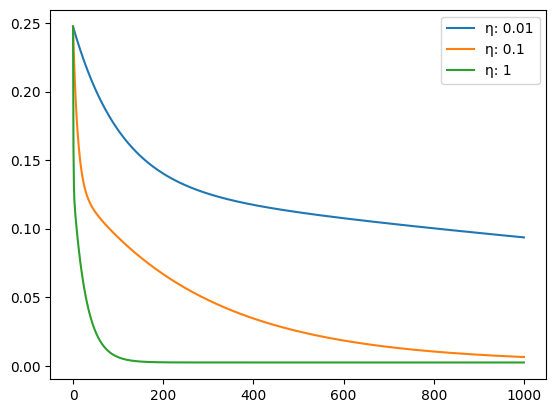

In [63]:
degree = 3
r = PolynomialRegression(degree)

for learning_rate in [0.01, 0.1, 1]:
    coefficients = np.zeros(degree + 1)
    errors = r.gradient_descent(coefficients, learning_rate=learning_rate, epochs=1000)
    epochs = np.array(list(errors.keys()))
    errors = np.array(list(errors.values()))
    plt.plot(epochs, errors, label=f'η: {learning_rate}')

plt.legend()
plt.show()